In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st

## Содержание: <a name='mark_'></a> 

### [Описание проекта](#mark0)  
### [Часть 1. Приоритизация гипотез](#mark1)
* [1.1 Приоритизация гипотез при помощи фраемворка ICE](#mark1.1)
* [1.2 Приоритизация гипотез при помощи фраемворка RICE](#mark1.2)
* [Выводы](#mark1.3)    

### [Часть 2. Анализ A/B-теста](#mark2)
* [2.1. Подготовка данных](#mark2.1)
* [2.2. Анализ A/B-теста](#mark2.2)
    * [2.2.1 Подготовка данных](#mark2.2.1)
    * [2.2.2 График кумулятивной выручки по группам](#mark2.2.2)
    * [2.2.3 График относительного изменения кумулятивного среднего чека группы B к группе A](#mark2.2.3)
    * [2.2.4 График график кумулятивной конверсии по группам](#mark2.2.4)
    * [2.2.5 График относительного изменения кумулятивной конверсии группы B к группе A](#mark2.2.5)
    * [2.2.6 Анализ выбросов и всплесков](#mark2.2.6)
    * [2.2.7 Подсчет статистической значимости](#mark2.2.7)
    * [Принятие решения по результатам теста](#mark2.2.8)

# Анализ результатов A/B-тестов

# Описание проекта <a name='mark0'></a>  
Вместе с отделом маркетинга интернет-магазина необходимо приоритизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты. 

### Описание данных

**Данные для первой части:**  
Файл **hypothesis**:
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение, тем дороже проверка гипотезы).

**Данные для второй части:**  
Файл **orders**:
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.
    
Файл **visitors**:
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез<a name='mark1'></a> 

In [2]:
# путь к документу:
path = 'E:\\Python\\datasets\\'

In [3]:
hypothesis = pd.read_csv(path + 'hypothesis.csv')

In [4]:
#чтобы видеть строки полностью
pd.options.display.max_colwidth = 150

In [5]:
#приведем заголовки таблицы к нижнему регистру
hypothesis.set_axis(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], axis = 'columns', inplace = True)

In [6]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Приоритизация гипотез при помощи фраемворка ICE<a name='mark1.1'></a> 

Проведем приоритизацию наших гипотез для увеличения выручки при помощи фраемворка ICE:

In [7]:
hypothesis_copy = hypothesis.copy()

In [8]:
hypothesis_copy['ICE'] = (hypothesis_copy['impact']*hypothesis_copy['confidence']) / hypothesis_copy['efforts']

In [9]:
hypothesis_copy[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


## Приоритизация гипотез при помощи фраемворка RICE<a name='mark1.2'></a> 

In [10]:
hypothesis_copy['RICE'] = ((hypothesis_copy['reach']*hypothesis_copy['impact']*hypothesis_copy['confidence']) 
                            / hypothesis_copy['efforts'])

In [11]:
hypothesis_copy[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


## Выводы<a name='mark1.3'></a> 

Фраемфорк **ICE**:  
Восьмая гипотеза - самая перспетивная, за ней идут гипотезы номер 0 и 7.  

Фраемфорк **RICE**:  
Седьмая гипотеза - самая перспетивная, за ней идут гипотезы номер 2,0 и 6, при этом гипотезы 0 и 6 набрали одинаковое количество баллов по данному фраемворку.

При этом топ-5 гипотез одинаков по составу для обеих метрик. Таким образом, скорее всего, иммет смысл начать проверку с гипотез номер 7 и 0, так как они занимают лидирующие позиции в обоих фраемворках.

# Часть 2. Анализ A/B-теста<a name='mark2'></a> 

## 2.1. Подготовка данных<a name='mark2.1'></a>

In [12]:
orders = pd.read_csv(path + 'orders.csv')
visits = pd.read_csv(path + 'visitors.csv')

In [13]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders.duplicated().sum()

0

Пропусков и дубликатов нет, но **date** (дату заказа) нужно привести к соответствующему типу данных:

In [16]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим, одинаково ли у нас распределено количество покупателей по группам А и В:

In [17]:
len(orders[orders['group']=='A'])

557

In [18]:
len(orders[orders['group']=='B'])

640

Итак, группы были сформированы не совсем ровные, так в группу В попало практически на 15% покупателей. Проверим, есть ли такие покупатели, которые оказались сразу в двух группах: 

In [19]:
broken_users = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
broken_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [20]:
broken_users.shape

(58,)

В нашем тесте присутствовало 58 посетителей, которые присутствуют сразу в обих группах.

Посмотрим, сколько они тратили денег:

In [21]:
broken_orders = orders.query('visitorId in @broken_users')

In [22]:
report = broken_orders.groupby(['visitorId', 'group']).agg({'revenue': 'sum'})
report

revenue
visitorId  group         
8300375    A         1790
           B        10510
199603092  A        19692
           B         3488
232979603  A           60
...                   ...
4186807279 B        32300
4256040402 A        48800
           B       127690
4266935830 A        78990
           B        78990

[116 rows x 1 columns]

Встречаются довольно большие покупки - пользователь с Id 4256040402 за группу А потратил 48800, а за группу В аж 127690.  
Необходимо довести до ответственных за проведение эксперимента людей, что у нас сложилась не очень честная картина.

In [23]:
visits

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [24]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [25]:
visits.duplicated().sum()

0

Пропусков и дубликатов так же нет, а **date** приведем к соответствующему типу данных:

In [26]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим, одинаково ли у нас распределено количество покупателей по группам А и В:

In [27]:
visits.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

Старый и новый сайт в сумме посмотрели примерно одинаковое количество людей.

[Обратно к содержанию](#mark_)  

## 2.2. Анализ A/B-теста<a name='mark2.2'></a>

### 2.2.1 Подготовка данных<a name='mark2.2.1'></a>

In [28]:
#Количество посещений интернет-магазина в день по группе А
visitorsADaily = visits[visits['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#Кумулятивное посещение интернет-магазина по дням по группе А
visitorsACumulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACumulative.columns = ['date', 'visitorsCumulativeA']

#Количество посещений интернет-магазина в день по группе В
visitorsBDaily = visits[visits['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#Кумулятивное посещение интернет-магазина по дням по группе В
visitorsBCumulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCumulative.columns = ['date', 'visitorsCumulativeB']

#Количество заказов в интернет-магазине в день по группе А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#Кумулятивное значение заказов в интернет-магазине по дням по группе А
ordersACumulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACumulative.columns = ['date', 'ordersCumulativeA', 'revenueCumulativeA']

#Количество заказов в интернет-магазине в день по группе В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#Кумулятивное значение заказов в интернет-магазине по дням по группе В
ordersBCumulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCumulative.columns = ['date', 'ordersCumulativeB', 'revenueCumulativeB']

#Сводная таблица
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left')

In [29]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCumulativeA,revenueCumulativeA,ordersCumulativeB,revenueCumulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCumulativeA,visitorsCumulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


### 2.2.2 График кумулятивной выручки по группам<a name='mark2.2.2'></a>

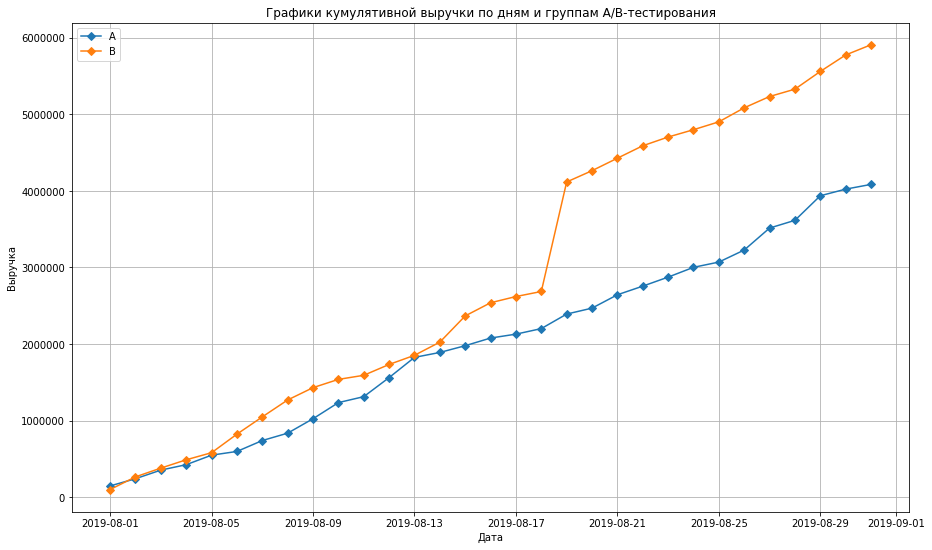

In [30]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


plt.figure(figsize=(15,9))
plt.plot(data['date'], data['revenueCumulativeA'], label='A', marker="D")
plt.plot(data['date'], data['revenueCumulativeB'], label='B', marker="D")
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.legend();

### Вывод  
Выручка увеличивается в течение всего теста для обеих групп.  
Группа В практически сразу опередила группу А, поначалу рост их показателей шел практически одинаково, но затем группа В  вырвалась вперед и лидировала до конца теста. При этом для группы В график выручки после 18 августа резко вырос. Это может сигнализировать либо о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Необходимо в дальнейшем это проверить.

### 2.2.3 График относительного изменения кумулятивного среднего чека группы B к группе A<a name='mark2.2.3'></a>

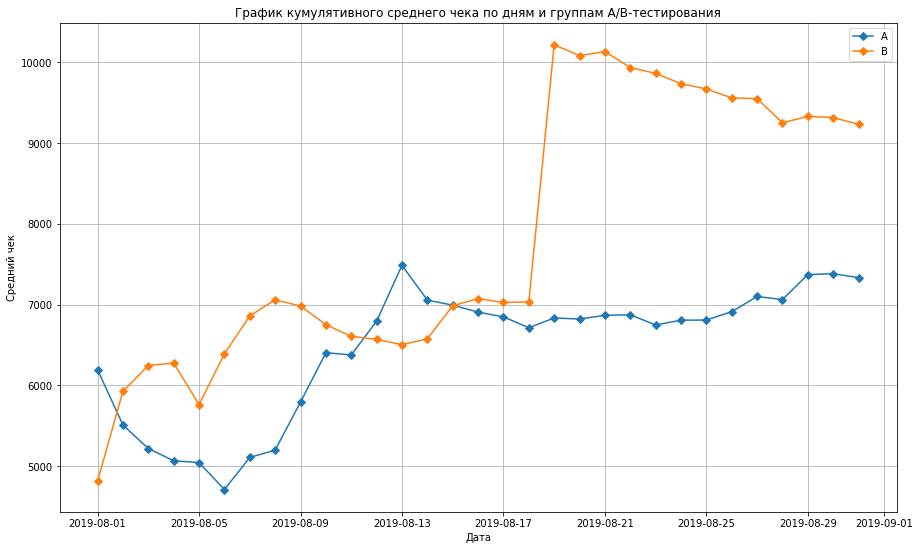

In [31]:
plt.figure(figsize=(15,9))
plt.plot(data['date'], data['revenueCumulativeA']/data['ordersCumulativeA'], label='A', marker="D")
plt.plot(data['date'], data['revenueCumulativeB']/data['ordersCumulativeB'], label='B', marker="D")
plt.title('График кумулятивного среднего чека по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.legend();

Построим график относительного различия для среднего чека:

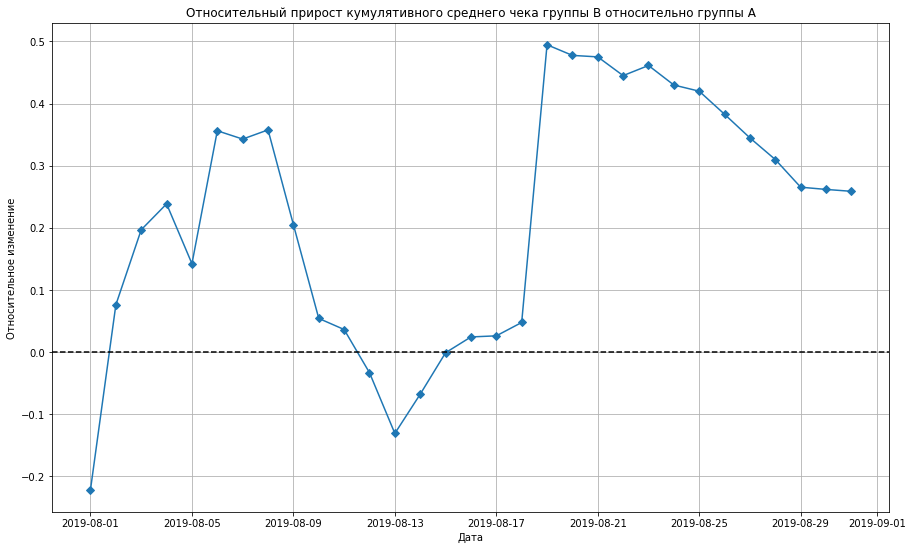

In [32]:
plt.figure(figsize=(15,9))
plt.plot(data['date'], 
        (data['revenueCumulativeB']/data['ordersCumulativeB'])
        /(data['revenueCumulativeA']/data['ordersCumulativeA'])-1, marker="D")
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный прирост кумулятивного среднего чека группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid(True);

### Вывод  
На большей части графика средний чек по группе B выше, чем по группе A. При этом наблюдается два пика: 6 и 19 августа. Возможно в эти периоды попали какие-то крупные покупки.

### 2.2.4 График график кумулятивной конверсии по группам<a name='mark2.2.4'></a>

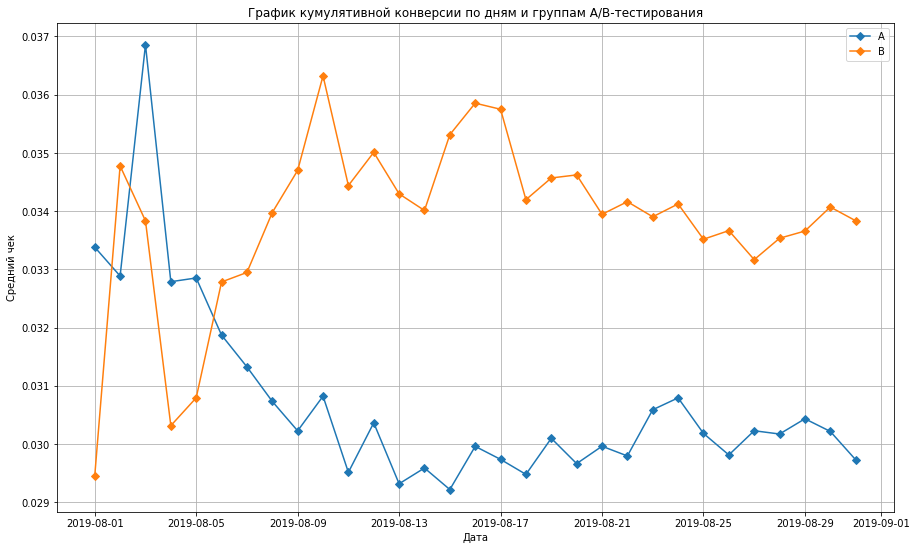

In [33]:
# Добавим кумулятивную конверсию для групп
data['cumulativeConversionA'] = data['ordersCumulativeA'] / data['visitorsCumulativeA']
data['cumulativeConversionB'] = data['ordersCumulativeB'] / data['visitorsCumulativeB']

#Строим графики
plt.figure(figsize=(15,9))
plt.plot(data['date'], data['cumulativeConversionA'], label='A', marker="D")
plt.plot(data['date'], data['cumulativeConversionB'], label='B', marker="D")
plt.title('График кумулятивной конверсии по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.legend();

### Вывод  
Вначале конверсия группы А была выше, однако после 5 августа конверсия группы В вырвалась вперед. При этом ни конверсия группы А, ни конверсия грыппы В не стабилизировались за время провденеия теста.

### 2.2.5 График относительного изменения кумулятивной конверсии группы B к группе A<a name='mark2.2.5'></a>


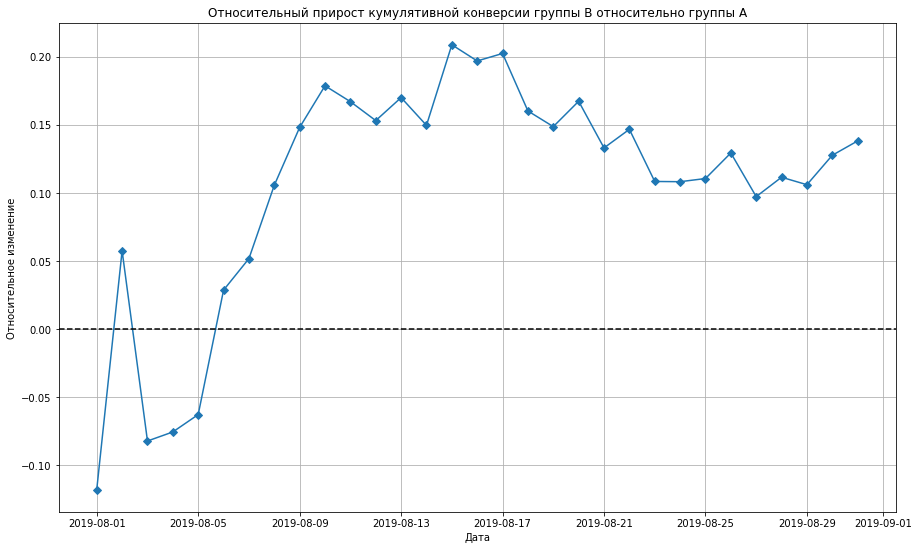

In [34]:
plt.figure(figsize=(15,9))
plt.plot(data['date'], 
         data['cumulativeConversionB']/data['cumulativeConversionA']-1, marker="D")
plt.title('Относительный прирост кумулятивной конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--');

### Вывод  
Накопительная конверсия по группе B практически на всем протяжении лежит значительно выше накопительной конверсии группы A. 

### 2.2.6 Анализ выбросов и всплесков<a name='mark2.2.6'></a>

На предыдущих этапах в ходе построения графиков были замечены аномальные скачки значений, которые могли появиться из-за того, что кто-то совершил или очень много заказов, или же очень дорогие заказы. Изучим эти аномалии.  
Посмотрим, сколько заказов делали посетители:

In [35]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','transactions']
ordersByUsers.sort_values(by='transactions',ascending=False).head(10)

,visitorId,transactions
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Создадим переменные **ordersByUsersA** и **ordersByUsersB** со столбцами, в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:

In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

Построим точечную диаграмму числа заказов на одного пользователя:

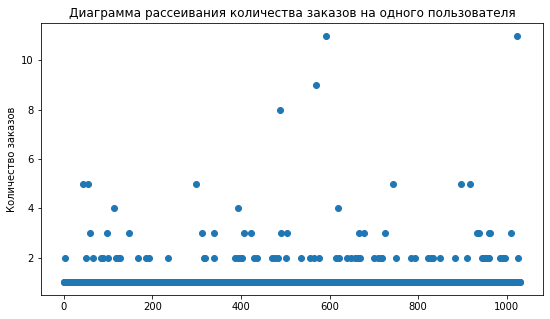

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(9,5))
plt.scatter(x_values, ordersByUsers['transactions'])
plt.title('Диаграмма рассеивания количества заказов на одного пользователя')
plt.ylabel('Количество заказов');

На графике видно, что основная доля количества заказов не превышала 2-3 заказов, однако встечались и такие, кто делал по 11 заказов.  
Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [38]:
np.percentile(ordersByUsers['transactions'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказов. И только 1% пользователей заказывали более четырех раз.  
Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеим аномальных пользователей по ней.  

Построим точечную диаграмму стоимости заказа на одного пользователя:

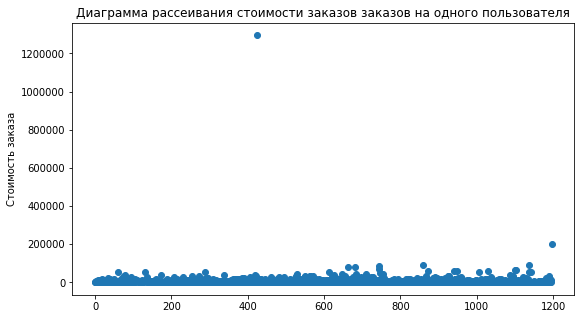

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеивания стоимости заказов заказов на одного пользователя')
plt.ylabel('Стоимость заказа');

На графике видно два аномальных значения: один около 200 т.р., второй - более 1 200 т.р.  
Посчитаем выборочные перцентили стоимости заказов на одного пользователя:

In [40]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

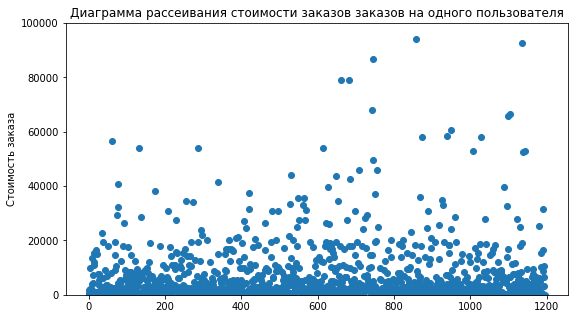

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders['revenue'])
plt.ylim([0, 100000])
plt.title('Диаграмма рассеивания стоимости заказов заказов на одного пользователя')
plt.ylabel('Стоимость заказа');

На этом граффике наглядно видно, что основная часть заказов лежит ниже отметки 20000

Не более 5% пользователей оформляли заказ более чем на 28000 р. И только 1% пользователей заказывали на сумму более 58233 р.. Выберем сумму в 28000 р. за нижнюю границу стоимости заказов, и отсеим аномально дорогие заказы по ней.

Создадим переменные **ordersByUsersA** и **ordersByUsersB**, в которых для пользователей, заказавших хотя бы 1 раз, укажем число совершённых заказов:

In [42]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

Сделаем срезы пользователей с числом заказов больше 2 — **usersWithManyOrders** и пользователей, совершивших заказы дороже 28 000 — **usersWithExpensiveOrders**. Объединим их в таблице **abnormalUsers**:

In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [44]:
abnormalUsers.shape

(74,)

Таким образом, у нас 74 аномальных пользователя.

### 2.2.7 Подсчет статистической значимости<a name='mark2.2.7'></a>  

**Гипотеза 1**  
**H0 (нулевая гипотеза)** — конверсия пользователей группы В равна конверсии пользователей группы А.  
**H1 (альтернативная гипотеза)** — конверсия пользователей группы В и А различаются.
    
**Гипотеза 2**  
**H0 (нулевая гипотеза)** — средний чек пользователей группы В равен среднему чеку пользователей группы А.  
**H1 (альтернативная гипотеза)** — средний чек пользователей группы В и А различается.

### Конверсия между группами
#### По "сырым" данным  

Объявим переменные **sampleA** и **sampleB**, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [45]:
#Количеств посетителей, которые ничего не заказали будет равно разнице между суммой посетителей и 
#количеством записей о заказах
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                      - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                                      - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим критерий и отформатируем p-value, округлив его до четырех знаков после запятой:

In [46]:
alpha = .05
results = st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')

print("p-value: {0:.4f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
    
print("Относительный выигрыш/проигрыш группы В: {0:.4f}".format(sampleB.mean()/sampleA.mean()-1))    

p-value: 0.0168
Отвергаем нулевую гипотезу: разница статистически значима
Относительный выигрыш/проигрыш группы В: 0.1381


#### По "очищенным" данным  

In [47]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                                                    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                    - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                                                    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                                    - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [48]:
alpha = .05
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')

print("p-value: {0:.4f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
    
print("Относительный выигрыш/проигрыш группы В: {0:.4f}".format(sampleBFiltered.mean()
                                                                                    /sampleAFiltered.mean()-1)) 

p-value: 0.0130
Отвергаем нулевую гипотезу: разница статистически значима
Относительный выигрыш/проигрыш группы В: 0.1727


**Вывод**:   
Конверсии групп A и B различаются по "сырым" и по "очищенным" данным. При этом относительный выигрыш группы В по "сырым" данным составляет 13,8%, а по "очищенным" - 20,4%.

### Различия в среднем чеке между группами
#### По "сырым" данным  

In [49]:
alpha = .05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                          alternative='two-sided')

print("p-value: {0:.4f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
    
print("Относительный выигрыш/проигрыш группы В: {0:.4f}".format(orders[orders['group']=='B']['revenue'].mean()
                                                            /orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.7293
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный выигрыш/проигрыш группы В: 0.2587


#### По "очищенным" данным  

In [50]:
alpha = .05
results = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')

print("p-value: {0:.4f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
    
print("Относительный выигрыш/проигрыш группы В: {0:.4f}".format(
orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
orders[np.logical_and(
orders['group']=='A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value: 0.7385
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный выигрыш/проигрыш группы В: -0.0196


**Вывод**:   
P-value по "сырым" и по "очищенным" данным значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом по сырым данным средний чек группы В был выше на 25,87%, но после очистки данных, он стал меньше на 1,66%.

### Принятие решения по результатам теста<a name='mark2.2.8'></a>  

Имеющиеся факты:
* Конверсии групп A и B различаются по "сырым" и по "очищенным" данным. При этом относительный выигрыш группы В по "сырым" данным составляет 13,8%, а по "очищенным" - 20,4%.;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту;
* График различия среднего чека позволил найти аномалии. Судя по нему в последнее время наметилась тенденция к уменьшению среднего чека группы В. 

Нас интересует **увеличение выручки**.  
**ВЫРУЧКА = СР.ЧЕК * ЗАКАЗЫ**  
**КОНВЕРСИЯ = ЗАКАЗЫ / ПОСЕТИТЕЛИ** => **ЗАКАЗЫ = КОНВЕРСИЯ * ПОСЕТИТЕЛИ**  
Таким образом, **ВЫРУЧКА = СР.ЧЕК * КОНВЕРСИЯ * ПОСЕТИТЕЛИ**  
На количество посетителей напрямую мы повлиять самим сайтом не можем. Здесь в большей степени действуют разные рекламные компании и тп. Так как мы исследуем изменения на сайте, то как раз влияем на конверсию и средний чек.  
В итоге мы признали, что средний чек у групп равен, а вот конверсия у группы B выше. **Следовательно, выручка группы B больше.**